# 코로나 데이터 시각화를 통한 추석기간 동안의 위험 지역 파악

## 1. 개요

곧 9월에 추석이 다가오고 있습니다. 코로나의 확산을 막기 위해서는 사람들 간의 접촉을 줄이고 좁은 공간에 밀집하지 않는 것이 중요합니다. 또한, 코로나로 인한 중증환자의 발생을 막기 위해서는 고령자 코로나 확진비율을 줄이는 것이 중요하다고 판단하였습니다. 만약 고령자층의 코로나 발생 비율이 높아졌을 경우 중증 환자의 비율도 높아지기 때문에 그에 대한 대비책이 강구되어져야하는 상황입니다.

코로나 확산 및 중증자의 악화를 막기 위해 정부는 여러 지역에 음압병동을 설치하거나 의사를 추가로 파견하는 등의 대비책을 세우고 있습니다. <b>음압병동 뿐만 아니라 종합병원, 보건소의 지역별 분포를 바탕으로, 지방에서 다량의 확진자가 발생했을 경우 코로나에 취약한 지역을 선정하여 어느 지역을 중심으로 방역체계를 확충해야하는지를 알려줍니다. </b>

### 1-1. 분석목표
코로나와 관련된 위험요소와 예방요소를 분석해서 위험한 지역을 도출해내는 것!

### 1-2. 예상변수 요인

#### 코로나와 관련된 위험요소
- 고령화인구 분포 (근거: 나이대에 따른 노인의 사망률 높음)
- 유동인구
- 인구밀집도
- 요양원 분포


#### 코로나와 관련된 예방요소
- 종합병원, 음압병동
- 보건소 분포

### 1-3. 데이터 목록 및 출처

[제공 데이터]
- COVID-19 Region
- COVID-19 city
- COVID-19 patient info
- 한국철도공사 여객·광역 일별·역별 승하차 데이터(2020.01.23-2020.01.27)

[외부데이터]
- 전국 병의원 및 약국 현황 2020.6

https://opendata.hira.or.kr/op/opc/selectOpenData.do?sno=10600&publDataTpCd=&searchCnd=&searchWrd=&pageIndex=4
- 인구 밀집도

http://kosis.kr/statHtml/statHtml.do?orgId=110&tblId=DT_11001N_2013_A001&vw_cd=MT_ZTITLE&list_id=110_11001_006_01&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

## 2. 결론

이번 시각화를 통해서 ‘코로나 데이터와 대중교통 데이터를 어떻게 잘 혼합할 수 있는지’에 대한 방법에 대해 고민을 해봤습니다. 저희는 python을 활용하여 데이터 전처리를 하였고 <b>pandas, 패키지의 matplotlib, folium, seaborn</b>을 활용하여 데이터를 시각화 하였습니다. 특히, 코로나와 관련된 위험요소 수치는 높고 예방요소 수치는 낮은 곳을 중심으로 주목하였습니다. 위험요소와 예방요소를 종합하여 분석한 결과 <b>(경남 부근) 광역시</b>가 코로나에 노출될 가능성이 가장 높다는 결론을 내렸습니다.

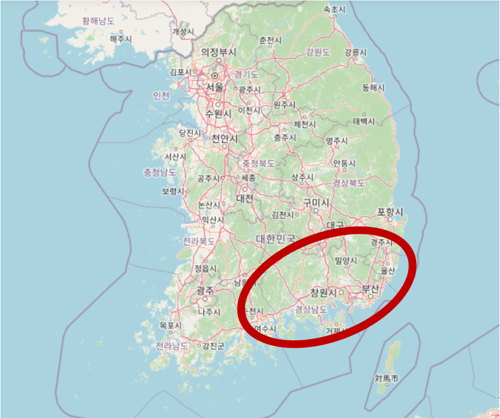

In [13]:
from PIL import Image
from IPython.display import IFrame, HTML
im=Image.open('광역시.png')
size=(500,500)
im.thumbnail(size)
im

#### 따라서 광역시(경남 부근)를 중심으로 음압병동, 종합병원, 의사 수 등 예방요소를 많이 확충할 필요가 있습니다.

## 3. 시각화 설명

## 3-1. 위험요소 시각화

## 노인인구분포비율 시각화

### 분석내용
Region데이터를 활용해 노인 인구 비율이 높은 지역 분포를 살펴봤습니다. 그 결과 경남(광역시), 호남 지역에서 노인인구가 높은 비중을 차지하고 있다는 것을 알 수 있었습니다

### 사용한 데이터
- 코로나 데이터 중 Region 데이터

In [1]:
import pandas as pd
import numpy as np

In [2]:
def describe (table):
    for i in table.columns:
        print(i, '\n')
        print(table[i].isnull().count(), '\n')
        print(table[i].describe(), '\n')

In [3]:
covidRegion = pd.read_csv('Region.csv')
covidRegion.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


### 데이터 전처리

In [4]:
elder = covidRegion.loc[:, ['latitude', 'longitude', 'elderly_population_ratio']]
elder.head(10)

,latitude,longitude,elderly_population_ratio
0,37.566953,126.977977,15.38
1,37.518421,127.047222,13.17
2,37.530492,127.123837,14.55
3,37.639938,127.025508,19.49
4,37.551166,126.849506,14.39
5,37.478290,126.951502,15.12
6,37.538712,127.082366,13.75
7,37.495632,126.887650,16.21
8,37.456852,126.895229,16.15
9,37.654259,127.056294,15.40


### matplotlib을 활용한 노인인구 분포 시각화

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

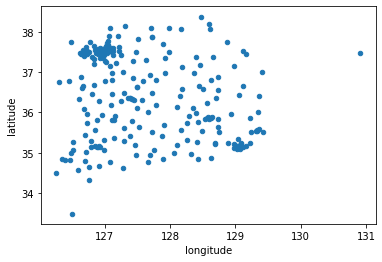

In [6]:
ax = elder.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel="longitude", ylabel="latitude")

[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

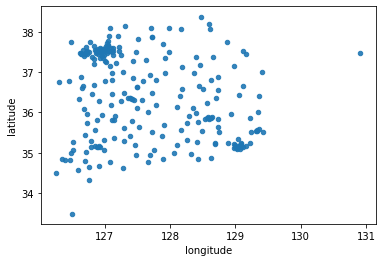

In [7]:
ax = elder.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9)
ax.set(xlabel="longitude", ylabel="latitude")

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45432 missing from current

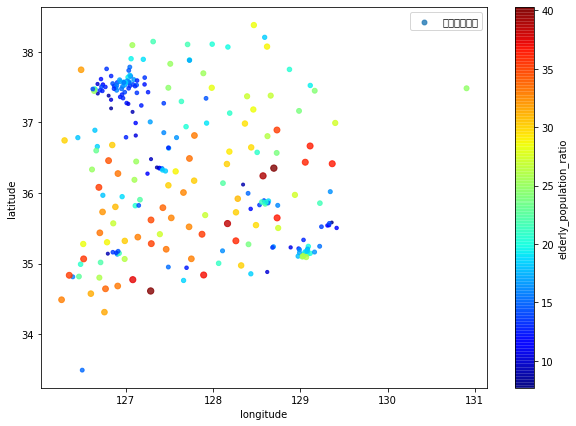

In [8]:
ax = elder.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
               s=elder['elderly_population_ratio'], label="노인인구비율", figsize=(10,7),
               c="elderly_population_ratio", cmap=plt.get_cmap("jet"), colorbar=True,
               sharex=False)
ax.set(xlabel='longitude', ylabel='latitude')
plt.legend()

## 나이에 따른 사망률

### 분석내용
PatientInfo 데이터를 활용해 확진자 수를 각 나이대 별로 확진자 및 사망자 수를 모았고 이를 시각화하였습니다. 10대에서 100대까지의 확진자 및 사망자를 비교한 그래프를 통해 나이가 점점 증가할 수록 사망률이 60대 5%에서 90대 30%까지 증가함을 알 수 있다.

### 사용한 데이터
- 코로나 데이터 중 PatientInfo 데이터

In [9]:
import random as rnd
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv('PatientInfo.csv')

data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


### 데이터 전처리

In [11]:
data.columns.values

array(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number',
       'symptom_onset_date', 'confirmed_date', 'released_date',
       'deceased_date', 'state'], dtype=object)

### age와 state 변수만 추출

In [12]:
train_df = pd.DataFrame(data, columns = ['age', 'state'])

train_df.head()

,age,state
0,50s,released
1,30s,released
2,50s,released
3,20s,released
4,20s,released


In [13]:
train_df.describe()

,age,state
count,3785,5165
unique,11,3
top,20s,released
freq,899,2929


In [14]:
train_df['state'].unique()

array(['released', 'deceased', 'isolated'], dtype=object)

### 각 세대 별 released 값, isolated 값 도출

In [15]:
df = train_df.groupby(['age']).state.value_counts()
df.head()

age   state   
0s    released     36
      isolated     30
100s  released      1
10s   released    115
      isolated     63
Name: state, dtype: int64

In [16]:
train_df.isnull().sum()

age      1380
state       0
dtype: int64

### 나이에 따른 확진자 대비 사망자 수 시각화

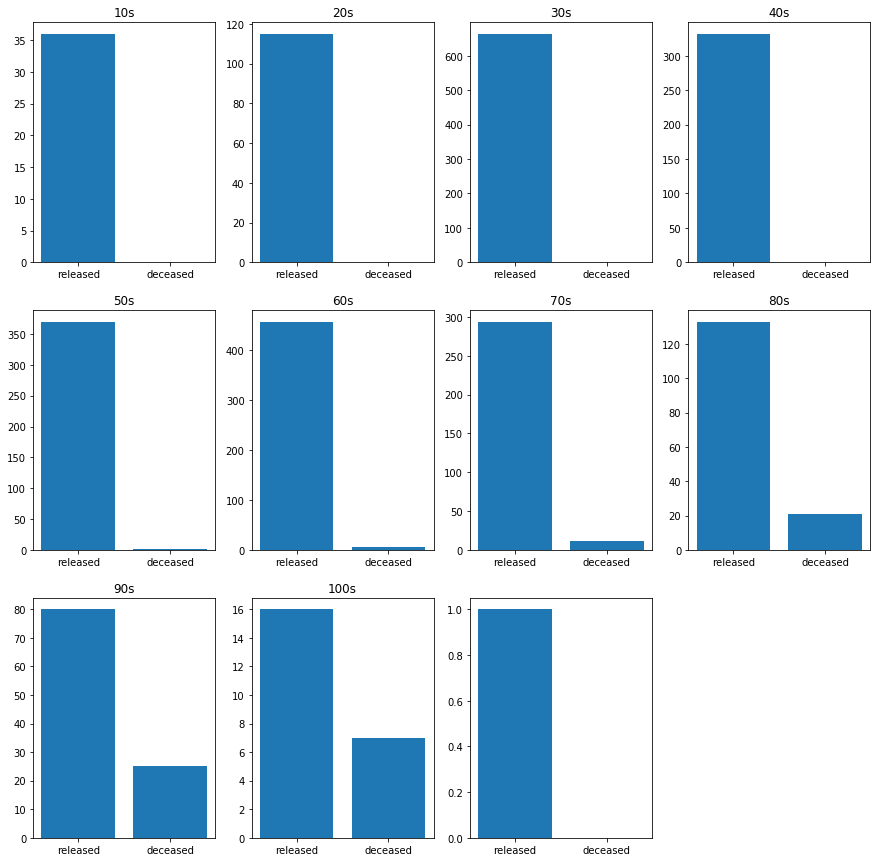

In [17]:
train_df.dropna(inplace = True)

ages = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 
        '90s', '100s']
plt.figure(figsize=(15,15))

def TheCountByAge(train):
    i=0
    for age in ages:
        df = train[train['age']==age]
        released = df[df['state']=='released'].state.count()
        deceased = df[df['state']=='deceased'].state.count()
        plt.title(age)
        plt.subplot(3, 4, i+1)
        plt.bar(['released', 'deceased'], [released, deceased])
        i = i+1
    plt.show()

TheCountByAge(train_df)

### 나이에 따른 사망률 시각화

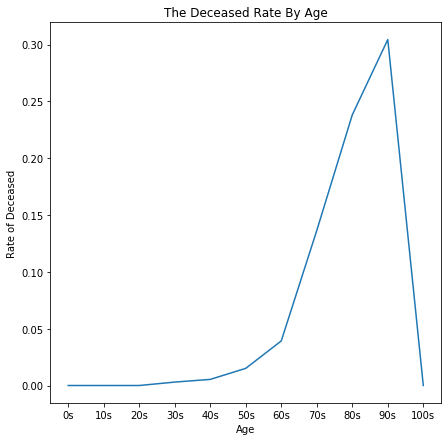

In [18]:
def TheRateByAge(train):
    ages = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 
        '90s', '100s']
    rate = []
    for age in ages:
        df = train[train['age']==age]
        released = df[df['state']=='released'].state.count()
        deceased = df[df['state']=='deceased'].state.count()
        rate.append(deceased/(released+deceased))
    plt.figure(figsize=(7,7))
    plt.title('The Deceased Rate By Age')
    plt.xlabel('Age')
    plt.ylabel('Rate of Deceased')
    plt.plot(ages, rate)
    plt.show()

TheRateByAge(train_df)

## 지역에 따른 사망률 시각화

### 분석내용 
지역을 기준으로 사망률을 시각화했습니다. 그 결과, 사망률은 중심 지역보다는 중심에 근접한 위성지역에서 높다는 것을 발견했습니다.

In [19]:
import io
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("deceasedRateRegion.csv", encoding = "euc-kr")

data.head()

,city,decased,isolated,released,total,사망률
0,가평,NaN,1.0,NaN,1,0.0
1,강남구,NaN,7.0,76.0,83,0.0
2,강동구,NaN,5.0,30.0,35,0.0
3,강릉시,NaN,1.0,8.0,9,0.0
4,강북구,NaN,6.0,18.0,24,0.0


### 데이터 전처리

In [20]:
data = data.fillna(value="0")

data = pd.DataFrame (data, columns = ["city", "사망률"])

filename2 = "Region.csv"

data2 = pd.read_csv(filename2)


In [21]:
data2 = pd.read_csv(filename2)

data2.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [22]:
data2 = pd.DataFrame(data2, columns = ["city", "latitude", "longitude"])

In [23]:
real_Data = pd.merge(data, data2, on="city")

In [24]:
idx = real_Data[real_Data['사망률']==1].index
print(idx)
real_Data=real_Data.drop(idx)

Int64Index([163], dtype='int64')


### 지역에 따른 사망률 시각화

In [25]:
import folium
map_1 = folium.Map(location=[37.4962, 127.303800])
for n in real_Data.index:
    folium.CircleMarker([real_Data["latitude"][n], real_Data["longitude"][n]],
                        radius = real_Data["사망률"][n]*400,
                        color='blue',fill_color='blue').add_to(map_1)
    folium.CircleMarker([real_Data['latitude'][n], real_Data['longitude'][n]],
                        radius = real_Data['사망률'][n]*400,
                        color='red', fill_color='red').add_to(map_1) 
map_1

## 인구 밀집도 시각화

### 분석내용
인구밀집도 통계를 활용해 인구가 많이 몰려있는 지역 분포를 살펴봤습니다. 그 결과, 특별시와 광역시를 중심으로 더 많은 인구가 몰려있는 것을 볼 수 있었습니다. 이를 통해 광역시에 더 많은 대비가 필요하다는 것을 알 수 있었습니다.

### 사용한 데이터
- 통계청에서 가져온 행정구역별 인구밀집도

In [26]:
data = pd.read_csv("Populationdensity.csv", encoding = "euc-kr" )

data.head()

,행정구역별(1),행정구역별(2),면적 (㎢),전년말주민등록인구수 (명),성별 (명),성별 (명).1,성별 (명).2,연령별 (명),연령별 (명).1,연령별 (명).2,연령별 (명).3,외국인등록인구수 (명),외국인등록인구수 (명).1,외국인등록인구수 (명).2,인구밀도 (명/㎢),인구증가율 (%)
0,행정구역별(1),행정구역별(2),소계,소계,소계,남자,여자,소계,0~14세(유소년),15~64세(생산가능),65세이상(고령),소계,남자,여자,소계,소계
1,총계,소계,100412.16,51696216,51778544,25855919,25922625,51729410,6773721,37591729,7363960,1178578,674507,504071,515.66,0.16
2,서울특별시,소계,605.24,9930616,9857426,4830206,5027220,9857426,1119266,7378259,1359901,267153,127651,139502,16286.73,-0.74
3,서울특별시,종로구,23.91,152737,154770,75967,78803,154770,14416,114324,26030,9487,4127,5360,6472.27,1.33
4,서울특별시,중구,9.96,125249,125709,62253,63456,125709,11306,93255,21148,8884,4084,4800,12621.65,0.37


### 데이터 전처리

In [27]:
data = pd.DataFrame (data, columns = ["행정구역별(2)", "인구밀도 (명/㎢)"])

data.isnull().sum()

filename2 = "Region.csv"

data2 = pd.read_csv(filename2)

data2.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [28]:
data2 = pd.DataFrame(data2, columns = ["city", "latitude", "longitude"])
data = data.rename(columns = {"행정구역별(2)" : "city", "인구밀도 (명/㎢)": "PopulationDensity"})
real_Data = pd.merge(data, data2, on="city")
real_Data.head()

,city,PopulationDensity,latitude,longitude
0,종로구,6472.27,37.572999,126.979189
1,중구,12621.65,37.563988,126.997530
2,중구,12621.65,35.106321,129.032256
3,중구,12621.65,35.869551,128.606184
4,중구,12621.65,37.473761,126.621693


### 인구밀집도 시각화

In [29]:
real_Data['PopulationDensity']=real_Data['PopulationDensity'].astype(float)

map_1 = folium.Map(location=[37.4962, 127.303800])
for n in real_Data.index:
    folium.CircleMarker([real_Data["latitude"][n], real_Data["longitude"][n]],
                        radius = real_Data["PopulationDensity"][n]/1000,
                        color='blue',fill_color='blue').add_to(map_1)
    folium.CircleMarker([real_Data['latitude'][n], real_Data['longitude'][n]],
                        radius = real_Data['PopulationDensity'][n]/1000,
                        color='red', fill_color='red').add_to(map_1) 
map_1

## 유동인구 시각화

### 분석내용
20년도 설날 유동인구 데이터(20.01.23-20.01.27)를 활용하여 20년도 추석 유동인구의 대략적인 추세를 예측해보았습니다. 그 결과 서울-광역시(경남 부근)을 중심으로 인구 유입과 인구 유출이 발생했다는 결론을 내렸습니다.

### 사용한 데이터
- 한국 철도 공사 : 여객 일별,역별 승하차 실적

In [30]:
df = pd.read_excel('city.xlsx',sheet_name = 'Sheet1')

df.head()

,도시,승차인원,하차인원,위도,경도
0,가평,8048,8426,37.4962,127.303800
1,강릉,37087,36567,38.0784,128.228302
2,경산,26277,24068,35.8293,128.804091
3,경주,22624,21675,36.4169,128.162384
4,계룡,5675,5440,36.2741,127.251857


### 데이터 전처리 
- 형식을 변경해준다.

In [31]:
df = df.astype({'위도': 'float'})

df['승차인원']=df['승차인원'].astype(float)
df['하차인원']=df['하차인원'].astype(float)

### 지도의 위치를 먼저 설정한다.
- 역별 위치에 승차인원의 크기에 따라 원을 형성한다.
- 승차인원은 빨강색, 하차인원은 파란색으로 표시한다.

In [32]:
map_1 = folium.Map(location=[37.4962, 127.303800])
for n in df.index:
    folium.CircleMarker([df['위도'][n], df['경도'][n]],
                        radius = df['승차인원'][n]/10000,
                        color='blue',fill_color='blue').add_to(map_1)
    folium.CircleMarker([df['위도'][n], df['경도'][n]],
                        radius = df['하차인원'][n]/10000,
                        color='red', fill_color='red').add_to(map_1) 
map_1

## 요양원 시각화

### 사용한 데이터
- 전국 병의원 및 약국 현황 2020.6
- https://opendata.hira.or.kr/op/opc/selectOpenData.do?sno=10600&publDataTpCd=&searchCnd=&searchWrd=&pageIndex=4

### 분석 내용
경기, 경남 지역 중심으로 코로나에 취약한 요양시설이 다수 분포되어져 있습니다. 그만큼 노인 집단감염 발생 확률이 높아지므로 해당지역의 방역체계에 힘을 가할 필요가 있습니다.


### 패캐지 및 csv 파일 불러오기

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

In [34]:
df=pd.read_csv("2020_hospital_data.csv")

df.head()

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,우편번호,...,전화번호,병원URL,개설일자,X좌표,Y좌표,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의 의사수
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합병원,220000,인천,220003,인천부평구,NaN,21431,...,032-1544-9004,http://www.cmcism.or.kr/,19810806.0,126.724899,37.484831,317,2,20,63,232
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합병원,110000,서울,110016,종로구,NaN,3181,...,02-2001-2001,http://www.kbsmc.co.kr,19790324.0,126.967750,37.568408,388,6,30,131,221
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합병원,110000,서울,110023,광진구,NaN,5030,...,1588-1533,http://www.kuh.ac.kr,19821116.0,127.071828,37.540376,431,4,37,159,231
3,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,41944,...,200-5114,http://knumc.knu.ac.kr,19100907.0,128.604125,35.866774,508,5,79,199,225
4,JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,52727,...,055-750-8000,http://www.gnuh.co.kr/,19861013.0,128.095672,35.176325,314,1,28,97,188


### 분석에 필요하지 않는 열 제거한 후 결측값 확인하기

In [35]:
df=df.drop(["암호화YKIHO코드","전화번호","병원URL","개설일자","일반의 의사수","인턴 의사수","레지던트 의사수","전문의 의사수","우편번호"],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73097 entries, 0 to 73096
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요양기관명   73097 non-null  object 
 1   종별코드    73097 non-null  int64  
 2   종별코드명   73097 non-null  object 
 3   시도코드    73097 non-null  int64  
 4   시도명     73097 non-null  object 
 5   시군구코드   73097 non-null  int64  
 6   시군구명    73097 non-null  object 
 7   읍면동     34436 non-null  object 
 8   주소      73097 non-null  object 
 9   X좌표     72875 non-null  float64
 10  Y좌표     72875 non-null  float64
 11  의사총수    73097 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 6.7+ MB


### 종별코드가 28인 요양원 데이터 셋 새로 생성하기

In [36]:
df3=df[df["종별코드"]==28]
df3

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
1874,(의) 예림의료재단 김제요양병원,28,요양병원,350000,전북,350600,김제시,NaN,전라북도 김제시 남북로 202 (요촌동),126.884936,35.802138,4
1875,(의)대선의료재단으뜸요양병원,28,요양병원,310000,경기,311102,안산상록구,본오동,"경기도 안산시 상록구 용신로 352 (본오동, 목화웨딩홀)",126.861151,37.301542,3
1876,(의)동남의료재단동남병원,28,요양병원,380000,경남,380100,김해시,삼계동,경상남도 김해시 가야로51번길 42 (삼계동),128.869237,35.272858,7
1877,(의)동남의료재단동남병원,28,요양병원,380000,경남,380100,김해시,삼계동,경상남도 김해시 가야로51번길 42 (삼계동),128.869237,35.272858,0
1878,(의)백천의료재단 김해제일요양병원,28,요양병원,380000,경남,380100,김해시,NaN,경상남도 김해시 내외중앙로 73 (내동),128.866692,35.236604,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3468,희연요양병원,28,요양병원,380000,경남,380705,창원성산구,NaN,"경상남도 창원시 성산구 원이대로393번길 25 케이프타운 2-4층 일부, 5-6층,...",128.662560,35.239960,14
3469,희윤요양병원,28,요양병원,380000,경남,380900,밀양시,NaN,경상남도 밀양시 부북면 춘화로 60 (),128.745310,35.509519,7
3470,힐락암요양병원,28,요양병원,220000,인천,220004,인천중구,NaN,인천광역시 중구 영종대로 106 (운서동),126.490910,37.494884,4
3471,힐링웰요양병원,28,요양병원,310000,경기,311500,남양주시,NaN,"경기도 남양주시 호평로46번길 14 4~5층 (호평동, ZENEW빌딩)",127.244625,37.654722,4


In [37]:
df3_num=len(df3)
print(df3_num)

1599


### matplotlib 한글 폰트 활용을 위한 코드 지정

In [38]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

### seaborn을 활용한 요양원 밀집도 그리기

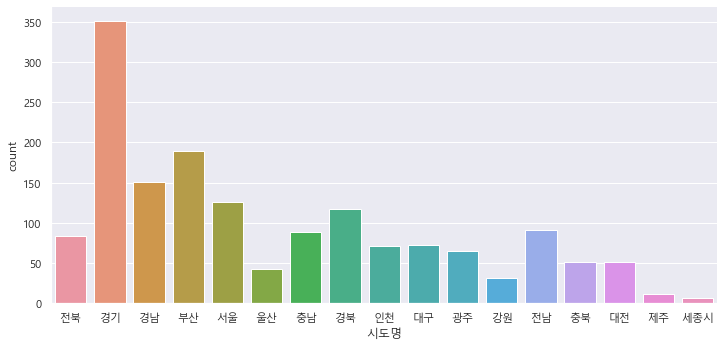

In [39]:
# 요양원 밀집도
sns.catplot(data=df3,x="시도명",kind="count",aspect=2)


## 3-2. 예방요소 시각화


## 종합병원, 읍압병동 및 보건소 시각화

### 분석내용
종합병원의 수는 수도권 중심으로 분포되어져 있고, 보건소는 전국단위로 고르게 분포되어져 있는 양상을 볼 수 있습니다. 즉, 기초적인 공공보건 시스템은 이미 갖춰진 상태임을 확인할 수 있습니다.
다만 코로나 치료와 사망률에 직접적인 영향을 끼치는 음압병동의 분포 측면에서는 수도권 지역에만 몰려있는 추세이므로 지방, <b>특히 경남 지역의 음압병동 수를 늘릴 필요가 있습니다.</b>

### 사용한 데이터
- 전국 병의원 및 약국 현황 2020.6
- https://opendata.hira.or.kr/op/opc/selectOpenData.do?sno=10600&publDataTpCd=&searchCnd=&searchWrd=&pageIndex=4


### 패키지 및 csv 파일 불러오기

In [40]:
import seaborn as sns
sns.set()

In [41]:

df=pd.read_csv("./2020_hospital_data.csv")

df.head()

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,우편번호,...,전화번호,병원URL,개설일자,X좌표,Y좌표,의사총수,일반의 의사수,인턴 의사수,레지던트 의사수,전문의 의사수
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합병원,220000,인천,220003,인천부평구,NaN,21431,...,032-1544-9004,http://www.cmcism.or.kr/,19810806.0,126.724899,37.484831,317,2,20,63,232
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합병원,110000,서울,110016,종로구,NaN,3181,...,02-2001-2001,http://www.kbsmc.co.kr,19790324.0,126.967750,37.568408,388,6,30,131,221
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합병원,110000,서울,110023,광진구,NaN,5030,...,1588-1533,http://www.kuh.ac.kr,19821116.0,127.071828,37.540376,431,4,37,159,231
3,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,41944,...,200-5114,http://knumc.knu.ac.kr,19100907.0,128.604125,35.866774,508,5,79,199,225
4,JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,52727,...,055-750-8000,http://www.gnuh.co.kr/,19861013.0,128.095672,35.176325,314,1,28,97,188


### 분석에 필요하지 않는 열 제거한 후 결측값 확인하기

In [42]:
df=df.drop(["암호화YKIHO코드","전화번호","병원URL","개설일자","일반의 의사수","인턴 의사수","레지던트 의사수","전문의 의사수","우편번호"],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73097 entries, 0 to 73096
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요양기관명   73097 non-null  object 
 1   종별코드    73097 non-null  int64  
 2   종별코드명   73097 non-null  object 
 3   시도코드    73097 non-null  int64  
 4   시도명     73097 non-null  object 
 5   시군구코드   73097 non-null  int64  
 6   시군구명    73097 non-null  object 
 7   읍면동     34436 non-null  object 
 8   주소      73097 non-null  object 
 9   X좌표     72875 non-null  float64
 10  Y좌표     72875 non-null  float64
 11  의사총수    73097 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 6.7+ MB


### 종별코드가 1, 11인 상급 종합 병원, 종합병원 데이터 셋 새로 생성하기

In [43]:
df1=df[df["종별코드"].isin([1,11])]
df1

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
0,가톨릭대학교인천성모병원,1,상급종합병원,220000,인천,220003,인천부평구,NaN,인천광역시 부평구 동수로 56 (부평동),126.724899,37.484831,317
1,강북삼성병원,1,상급종합병원,110000,서울,110016,종로구,NaN,서울특별시 종로구 새문안로 29 (평동),126.967750,37.568408,388
2,건국대학교병원,1,상급종합병원,110000,서울,110023,광진구,NaN,서울특별시 광진구 능동로 120-1 (화양동),127.071828,37.540376,431
3,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",128.604125,35.866774,508
4,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,경상남도 진주시 강남로 79 (칠암동),128.095672,35.176325,314
...,...,...,...,...,...,...,...,...,...,...,...,...
357,홍익병원,11,종합병원,110000,서울,110020,양천구,신정동,서울특별시 양천구 목동로 225 홍익병원본관 (신정동),126.863655,37.528484,67
358,홍천아산병원,11,종합병원,320000,강원,320013,홍천군,NaN,강원도 홍천군 홍천읍 산림공원1길 17 17,127.894854,37.690830,12
359,효산의료재단 안양샘병원,11,종합병원,310000,경기,310701,안양만안구,NaN,"경기도 안양시 만안구 삼덕로 9 (안양동, 안양샘병원)",126.924394,37.393523,109
360,효산의료재단 지샘병원,11,종합병원,310000,경기,311400,군포시,NaN,"경기도 군포시 군포로 591 (당동, (G샘병원)군포샘병원)",126.947316,37.358672,77


In [44]:
df1_num=len(df1)
print(df1_num)

362


### 종별코드가 71, 72, 73, 75인 보건소 데이터 셋 새로 생성하기

In [45]:
df2=df[df["종별코드"].isin([71,72,73,75])]
df2

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
54760,가평군보건소,71,보건소,310000,경기,310001,가평군,가평읍,경기도 가평군 가평읍 가화로 155-18 (가평읍),127.510555,37.833513,4
54761,강남구보건소,71,보건소,110000,서울,110001,강남구,삼성동,서울특별시 강남구 선릉로 668 (삼성동),127.042283,37.516393,9
54762,강동구보건소,71,보건소,110000,서울,110002,강동구,NaN,서울특별시 강동구 성내로 45 (성내동),127.125553,37.529311,7
54763,강릉시보건소,71,보건소,320000,강원,320100,강릉시,NaN,강원도 강릉시 남부로17번길 38 (내곡동),128.882832,37.742800,2
54764,강북구보건소,71,보건소,110000,서울,110024,강북구,번동,서울특별시 강북구 한천로 897 (번동),127.038795,37.632359,11
...,...,...,...,...,...,...,...,...,...,...,...,...
58234,청송군보건의료원,75,보건의료원,370000,경북,370023,청송군,청송읍,경상북도 청송군 청송읍 의료원길 19-19 19,129.051834,36.431146,15
58235,청양군보건의료원,75,보건의료원,340000,충남,340014,청양군,NaN,충청남도 청양군 청양읍 칠갑산로7길 54 (),126.804939,36.455020,16
58236,태안군보건의료원,75,보건의료원,340000,충남,340016,태안군,NaN,충청남도 태안군 태안읍 서해로 1952-16 (),126.323197,36.751878,24
58237,평창군보건의료원,75,보건의료원,320000,강원,320012,평창군,NaN,강원도 평창군 평창읍 노성로 11 (),128.390751,37.368944,13


In [46]:
df2_num=len(df2)
print(df2_num)

3479


### 보건소 시도별 분포 수 확인하기

In [47]:
df2["시도명"].unique()
df2_num=df2["시도명"].value_counts()
print(df2_num)
df2_num[4]

전남     563
경북     559
경남     415
전북     402
충남     401
경기     333
충북     267
강원     245
제주      64
인천      63
서울      33
부산      32
대구      25
울산      24
대전      19
세종시     18
광주      16
Name: 시도명, dtype: int64


401

In [48]:

df2_num1 = pd.DataFrame(df2_num)
df2_num1
df2_num1 = df2_num1.reset_index()
df2_num1.columns = ['시도명', 'counts']
df2_num1

,시도명,counts
0,전남,563
1,경북,559
2,경남,415
3,전북,402
4,충남,401
5,경기,333
6,충북,267
7,강원,245
8,제주,64
9,인천,63


### 음압병동 데이터 셋 새로 생성해내기

In [49]:
# 음압병동 데이터 프레임 만들기
df5=df[df["요양기관명"].isin(["국립중앙의료원","서울대학교병원","서울특별시서울의료원","중앙대학교병원","의료법인한전의료재단 한일병원","국군수도병원","의료법인명지의료재단명지병원","분당서울대학교병원","인하대학교의과대학부속병원","의료법인 길의료재단 길병원","강원도강릉의료원","부산광역시의료원","인천광역시의료원","강원대학교병원","세종충남대학교병원","충북대학교병원","단국대학교의과대학부속병원","전북대학교병원","원광대학교병원","전남대학교병원","조선대학교병원","국립목포병원","동국대학교의과대학경주병원","대구의료원","경북대학교병원","학교법인 울산공업학원 울산대학교병원","경상대학교병원","부산대학교병원","제주대학교병원"])]
df5

,요양기관명,종별코드,종별코드명,시도코드,시도명,시군구코드,시군구명,읍면동,주소,X좌표,Y좌표,의사총수
3,경북대학교병원,1,상급종합병원,230000,대구,230006,대구중구,NaN,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",128.604125,35.866774,508
4,경상대학교병원,1,상급종합병원,380000,경남,380500,진주시,NaN,경상남도 진주시 강남로 79 (칠암동),128.095672,35.176325,314
10,단국대학교의과대학부속병원,1,상급종합병원,340000,충남,340202,천안동남구,NaN,충청남도 천안시 동남구 망향로 201 (안서동),127.172575,36.841590,343
13,부산대학교병원,1,상급종합병원,210000,부산,210006,부산서구,NaN,부산광역시 서구 구덕로 179 (아미동1가),129.018803,35.100848,550
14,분당서울대학교병원,1,상급종합병원,310000,경기,310403,성남분당구,NaN,"경기도 성남시 분당구 구미로173번길 82 (구미동, 분당서울대학교병원)",127.123251,37.351981,751
16,서울대학교병원,1,상급종합병원,110000,서울,110016,종로구,NaN,서울특별시 종로구 대학로 101 (연건동),126.999017,37.579715,1612
24,원광대학교병원,1,상급종합병원,350000,전북,350300,익산시,NaN,전라북도 익산시 무왕로 895 (신동),126.959579,35.964639,289
25,의료법인 길의료재단 길병원,1,상급종합병원,220000,인천,220006,인천남동구,NaN,인천광역시 남동구 남동대로774번길 21-0 의료법인길의료재단길병원,126.709226,37.452171,551
27,인하대학교의과대학부속병원,1,상급종합병원,220000,인천,220004,인천중구,신흥동3가,인천광역시 중구 인항로 27 (신흥동3가),126.634096,37.458679,426
29,전남대학교병원,1,상급종합병원,240000,광주,240001,광주동구,NaN,광주광역시 동구 제봉로 42 (학동),126.921964,35.141921,472


In [50]:
# 종합병원 지역별 밀집도
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

### seaborn을 활용한 종합병원 밀집도 나타내기

<Figure size 7200x14400 with 0 Axes>

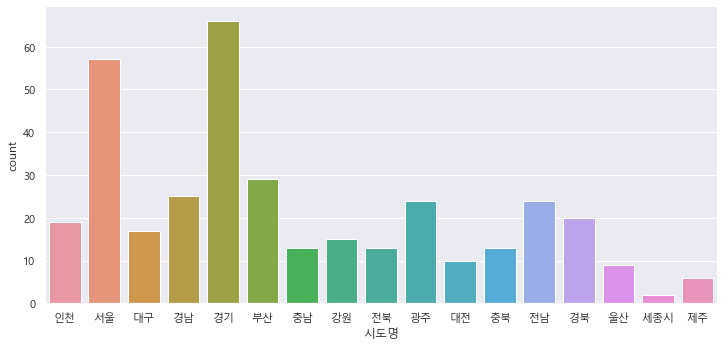

In [51]:
plt.figure(figsize=(100, 200))
sns.catplot(data=df1,x="시도명",kind="count",aspect=2)

### seaborn을 활용한 보건소 밀집도 나타내기

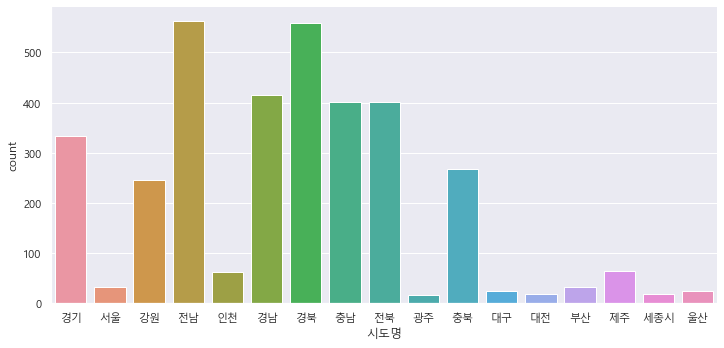

In [52]:
# 보건소 밀집도
sns.catplot(data=df2,x="시도명",kind="count",aspect=2)


### seaborn을 활용한 음압병동 밀집도 나타내기

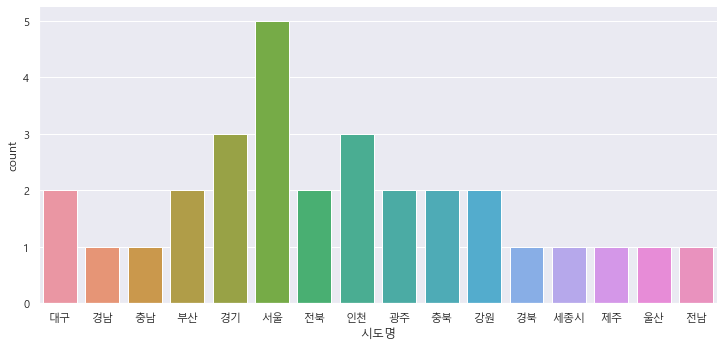

In [53]:
# 음압병동 밀집도
sns.catplot(data=df5,x="시도명",kind="count",aspect=2)

### folium 패캐지를 활용하여 종합병원, 보건소, 음압병동 수를 지도에 시각화하기

### folium 패캐지 불러오기

In [54]:
import folium

map_osm1= folium.Map(location=[37.566647,126.978426])
map_osm1

### 종합병원 지도 시각화

In [55]:
for i in range(0,len(df1)):
    x=df1.loc[i,"X좌표"]
    y=df1.loc[i,"Y좌표"]
    try: 
        marker1 = folium.Marker([y,x],icon=folium.Icon(color='red'))
        marker1.add_to(map_osm1)
    except:
        continue
        
map_osm1

### 보건소 밀집도 시각화
- 기존에는 상단의 종합병원 지도 시각화와 같은 뱡식으로 진행하였으나 보건소 수가 방대하여 시도별 보건소 수를 지도에 시각화함

In [56]:

df2_num1["x좌표"]=[34.988560,36.915393,35.463240,35.735203,36.555894,37.239623,36.702182,37.861203,33.445559,37.491168,
                37.544721, 35.182330, 35.829581,35.551914, 36.337627,36.599418,35.162677]
df2_num1["y좌표"]=[126.958681, 128.889106, 128.159576, 127.127586, 126.807376, 127.216028, 127.637123, 128.203087, 126.500047, 126.704551, 126.980941, 129.069042, 128.56256, 129.241625, 127.386728, 127.255221
, 126.832157]
# 전남     563  34.988560, 126.958681
# 경북     559  36.915393, 128.889106
# 경남     415  35.463240, 128.159576
# 전북     402  35.735203, 127.127586
# 충남     401  36.555894, 126.807376
# 경기     333  37.239623, 127.216028
# 충북     267  36.702182, 127.637123
# 강원     245  37.861203, 128.203087
# 제주      64  33.445559, 126.500047
# 인천      63  37.491168, 126.704551
# 서울      33  37.544721, 126.980941
# 부산      32  35.182330, 129.069042
# 대구      25 35.829581, 128.562568
# 울산      24  35.551914, 129.241625
# 대전      19  36.337627, 127.386728
# 세종시    18  36.599418, 127.255221
# 광주        35.162677, 126.832157

In [57]:
# popup --> 지점에 이름을 표시
# 각 지역별 보건소의 개수 count하고 개수에 비례하게 원형 마커의 크기를 키우기. 원형마커의 중심점은 해당 지역의 중심지.
map_osm3 = folium.Map(location=[37.502549, 127.024867])

for i in range(0,len(df2_num1)):
    x=df2_num1.loc[i,"x좌표"]
    y=df2_num1.loc[i,"y좌표"]
    counts=df2_num1.loc[i,"counts"]
    city=df2_num1.loc[i,"시도명"]
    ran=int(0.1*counts)
    try: 
        marker3 = folium.CircleMarker(location=[x,y],radius=ran,color='#3186cc',fill_color='#3186cc',popup=city)
        marker3.add_to(map_osm3)
    except:
        continue
        

map_osm3

### 음압병동 지도 시각화하기

In [58]:
map_osm4= folium.Map(location=[37.566647,126.978426])
for i in df5.index:
    x=df5.loc[i,"X좌표"]
    y=df5.loc[i,"Y좌표"]
    try: 
        marker1 = folium.Marker([y,x],icon=folium.Icon(color='red'))
        marker1.add_to(map_osm4)
    except:
        continue
        
map_osm4

# 시각화 자료 분서 및 결론 도출

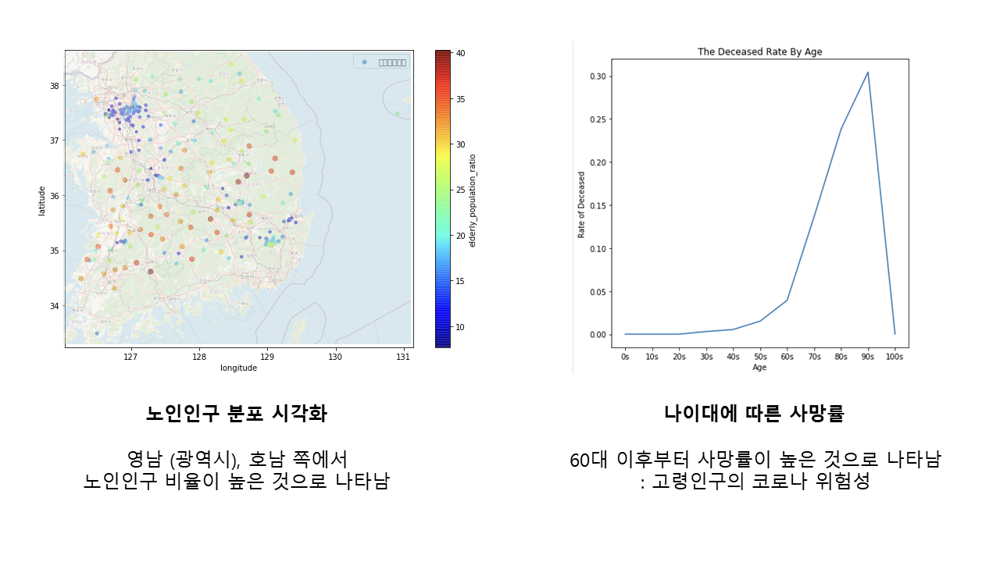

In [26]:
from PIL import Image
from IPython.display import IFrame, HTML
im1=Image.open('사진 정리본/슬라이드1.png')
size=(1000,1000)
im1.thumbnail(size)
im1

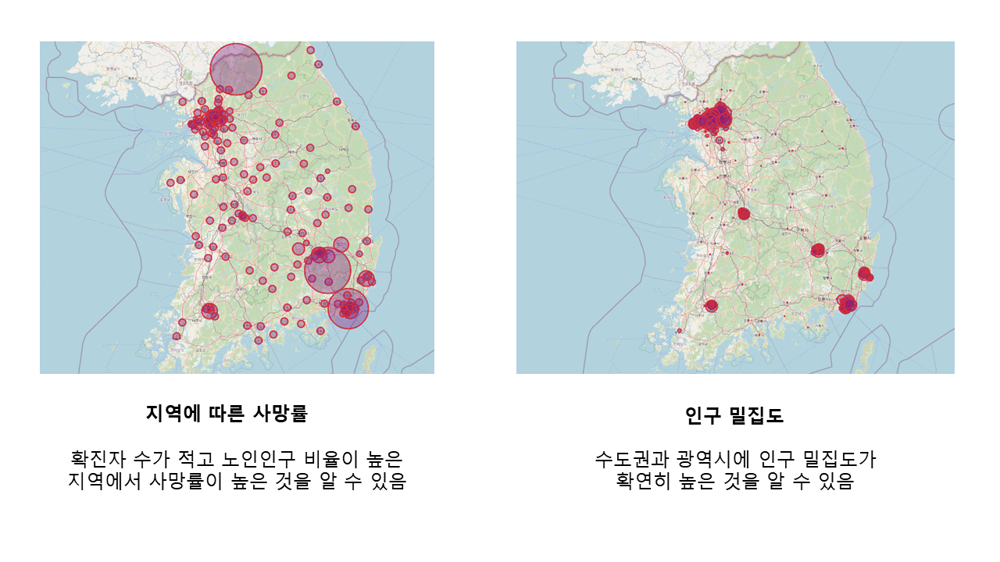

In [19]:
im2=Image.open('사진 정리본/슬라이드2.png')
size=(1000,1000)
im2.thumbnail(size)
im2

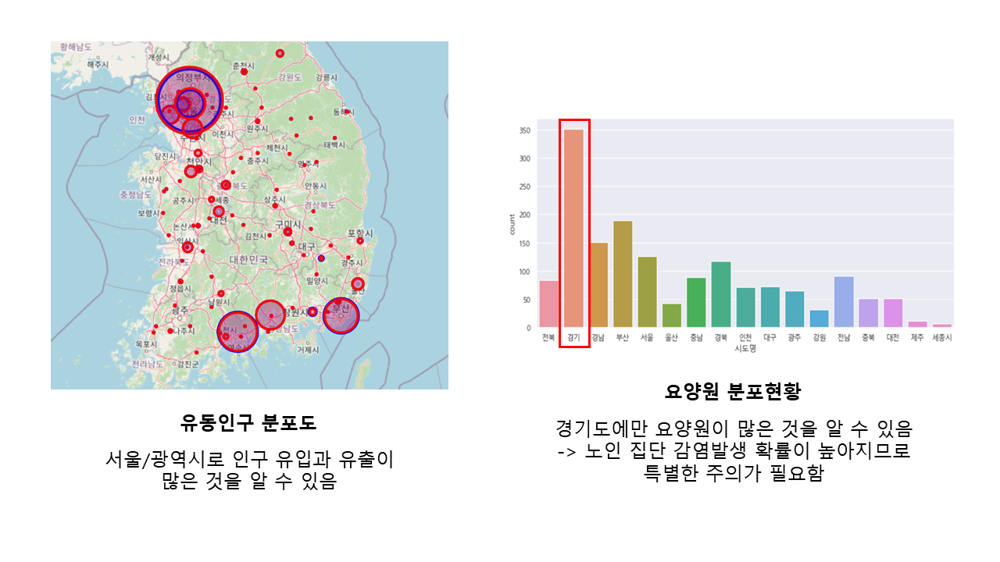

In [21]:
im3=Image.open('사진 정리본/슬라이드3.png')
size=(1000,1000)
im3.thumbnail(size)
im3

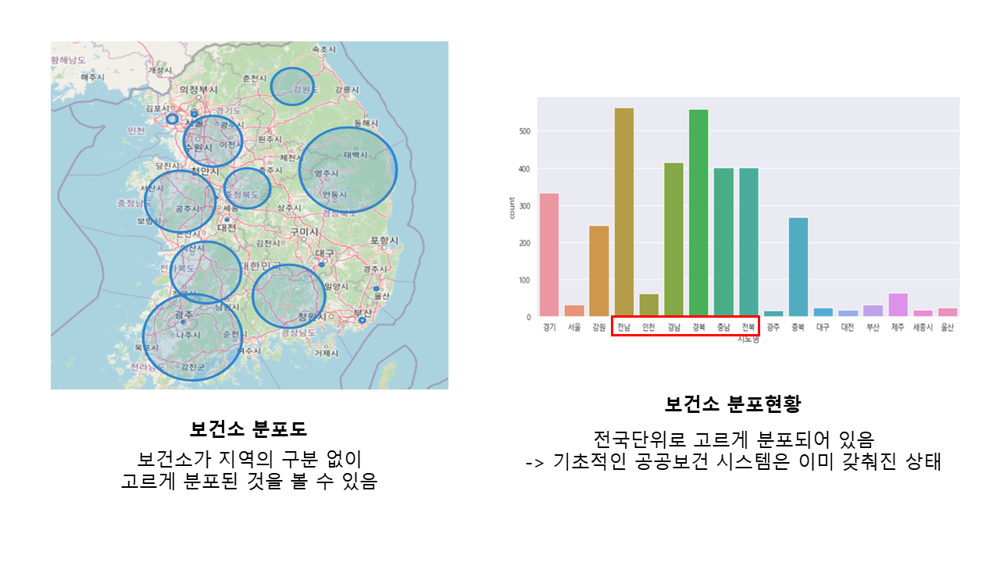

In [22]:
im4=Image.open('사진 정리본/슬라이드4.png')
size=(1000,1000)
im4.thumbnail(size)
im4

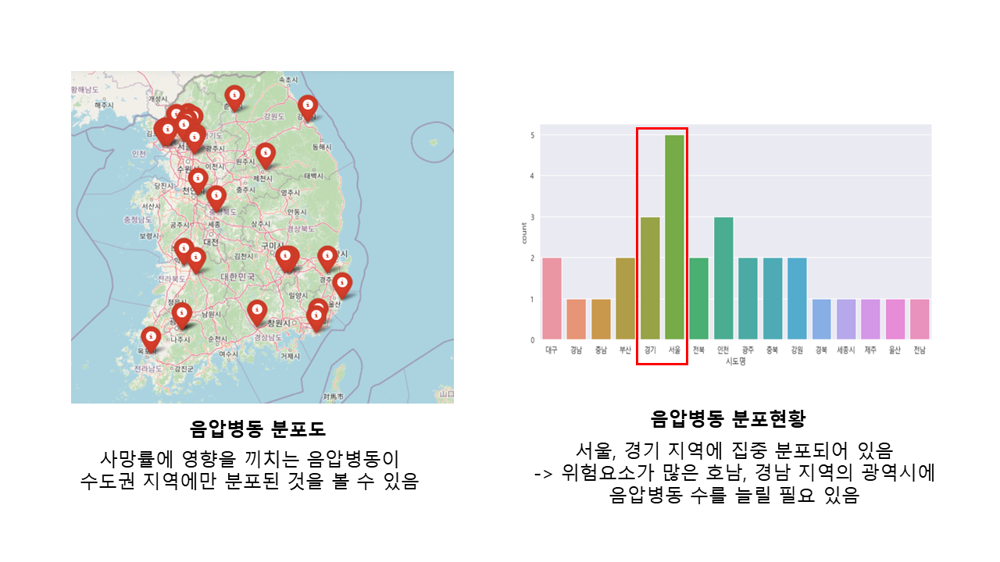

In [23]:
im5=Image.open('사진 정리본/슬라이드5.png')
size=(1000,1000)
im5.thumbnail(size)
im5

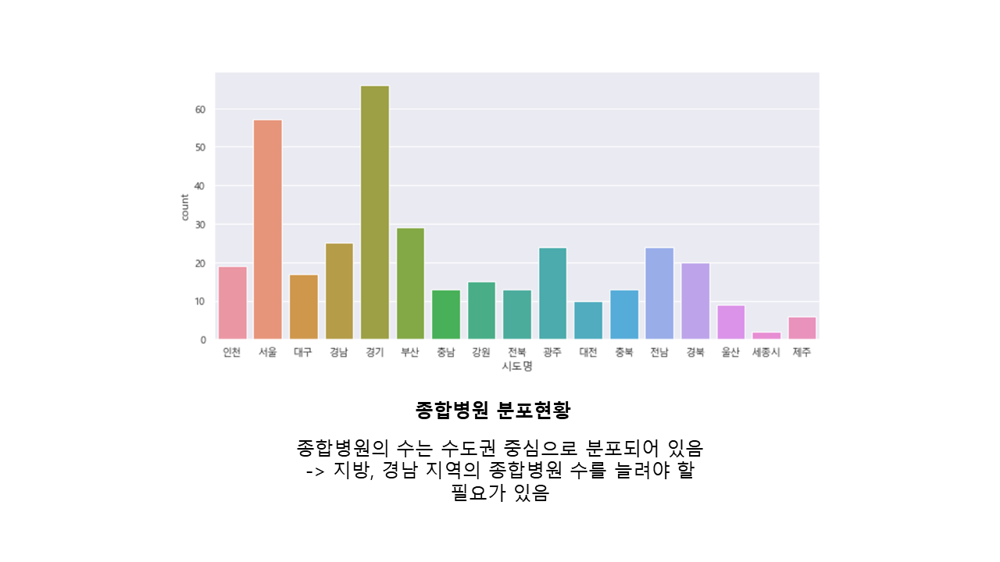

In [24]:
im6=Image.open('사진 정리본/슬라이드6.png')
size=(1000,1000)
im6.thumbnail(size)
im6